In [28]:
import warnings
warnings.filterwarnings("ignore", module=r"matplotlib\..*")

In [29]:
import pandas as pd
import numpy as np
import os

relpath = '..\\data\\Global_Superstore2.csv'
abspath = os.path.abspath(relpath)

df = pd.read_csv(abspath, header=0, encoding = "ISO-8859-1")

# Analiza  podataka

Cilj istrazivanja ovog dataseta je da se uspostavi veza sa prodajom, profitom i visinom cena proizvoda, tj. sta donosi veci profit, nize cene proizvoda, troskova i kako sve to utice na prodaju i profit.

In [30]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [32]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [ ]:
# Derive Unit Price and Profit Margin from the clustering-ready data
df_analysis = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].copy()
df_analysis['Unit Price'] = df_analysis['Sales'] / df_analysis['Quantity']
df_analysis['Profit Margin'] = df_analysis['Profit'] / df_analysis['Sales']

# Descriptive statistics
df_analysis[['Sales', 'Profit', 'Unit Price', 'Profit Margin', 'Shipping Cost', 'Discount']].describe().round(2)

,Sales,Profit,Unit Price,Profit Margin,Shipping Cost,Discount
count,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,246.49,28.61,71.66,0.05,26.38,0.14
std,487.57,174.34,113.58,0.47,57.30,0.21
min,0.44,-6599.98,0.34,-4.73,0.00,0.00
25%,30.76,0.00,11.80,0.00,2.61,0.00
50%,85.05,9.24,29.40,0.17,7.79,0.00
75%,251.05,36.81,82.16,0.33,24.45,0.20
max,22638.48,8399.98,3773.08,0.50,933.57,0.85


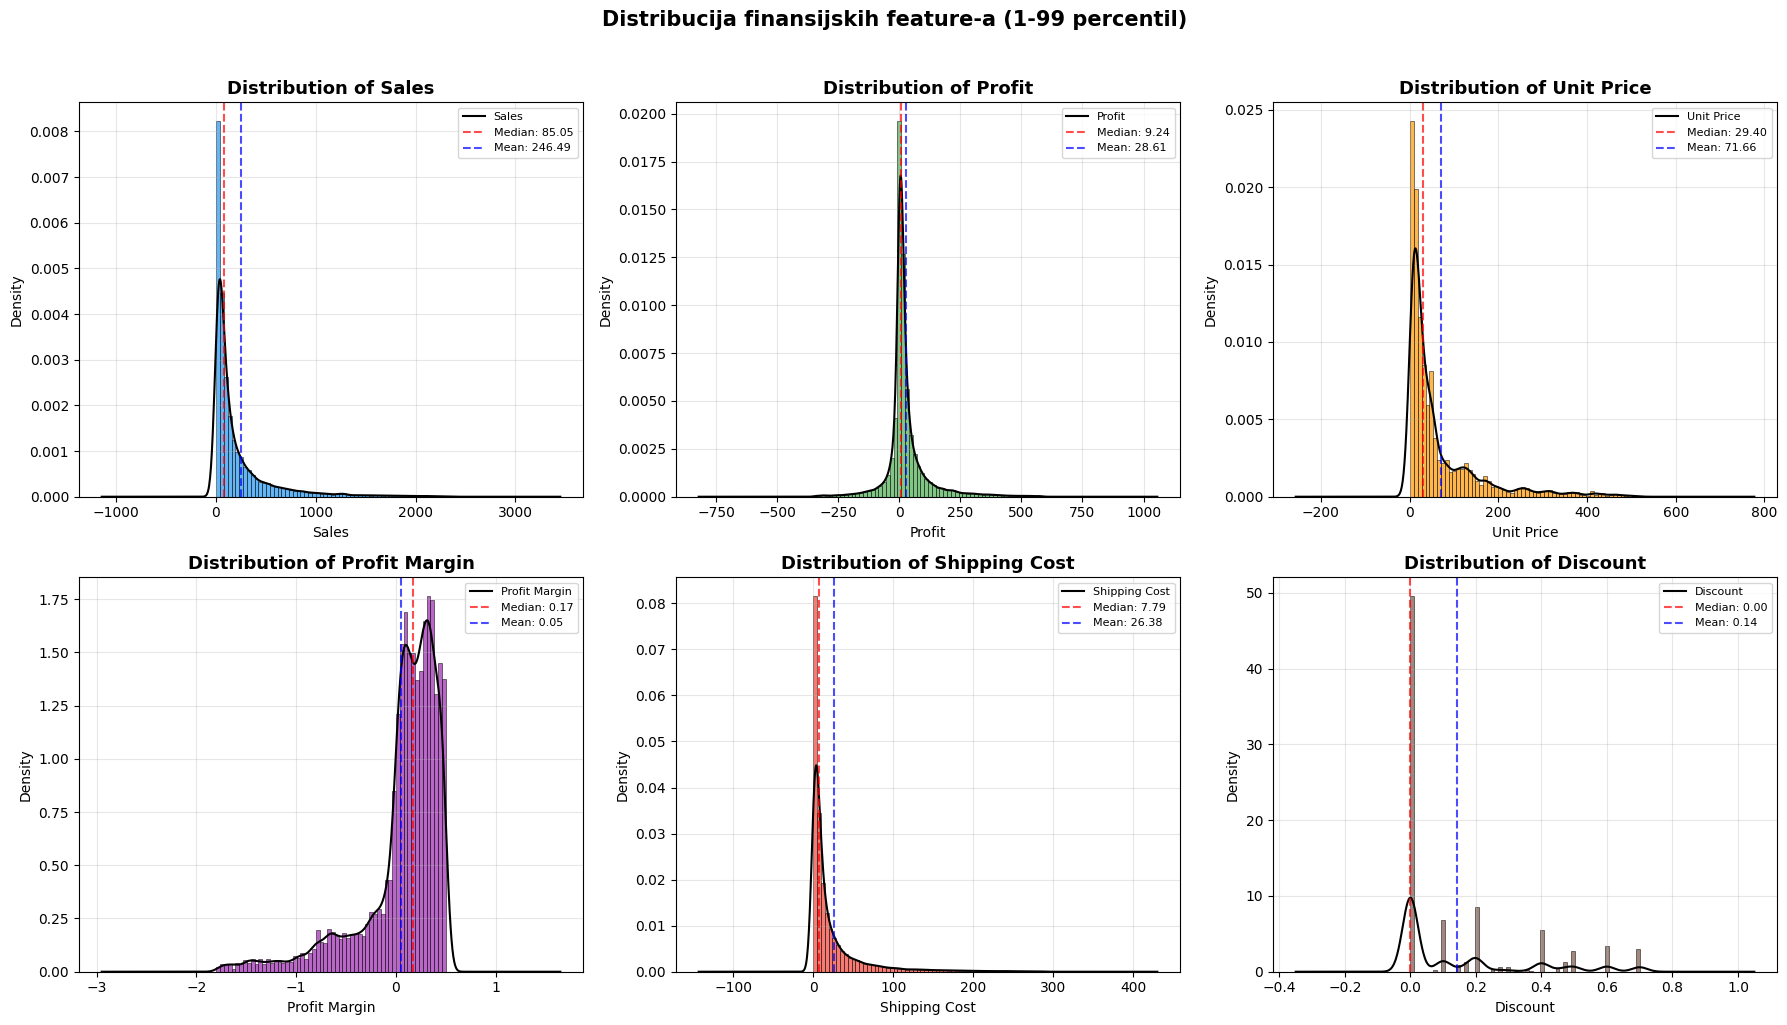

In [ ]:
# Distribution plots for Sales, Profit, and Unit Price (log scale for skewed data)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features = ['Sales', 'Profit', 'Unit Price', 'Profit Margin', 'Shipping Cost', 'Discount']
colors = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336', '#795548']

for idx, (feat, color) in enumerate(zip(features, colors)):
    row, col = idx // 3, idx % 3
    ax = axes[row][col]
    data = df_analysis[feat].dropna()
    
    # Remove extreme outliers for better visualization (keep 1st-99th percentile)
    q_low, q_high = data.quantile(0.01), data.quantile(0.99)
    data_trimmed = data[(data >= q_low) & (data <= q_high)]
    
    ax.hist(data_trimmed, bins=60, color=color, alpha=0.7, edgecolor='black', linewidth=0.5, density=True)
    data_trimmed.plot.kde(ax=ax, color='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feat}', fontsize=13, fontweight='bold')
    ax.set_xlabel(feat)
    ax.set_ylabel('Density')
    ax.axvline(data.median(), color='red', linestyle='--', alpha=0.7, label=f'Median: {data.median():.2f}')
    ax.axvline(data.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Mean: {data.mean():.2f}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribucija finansijskih feature-a (1-99 percentil)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

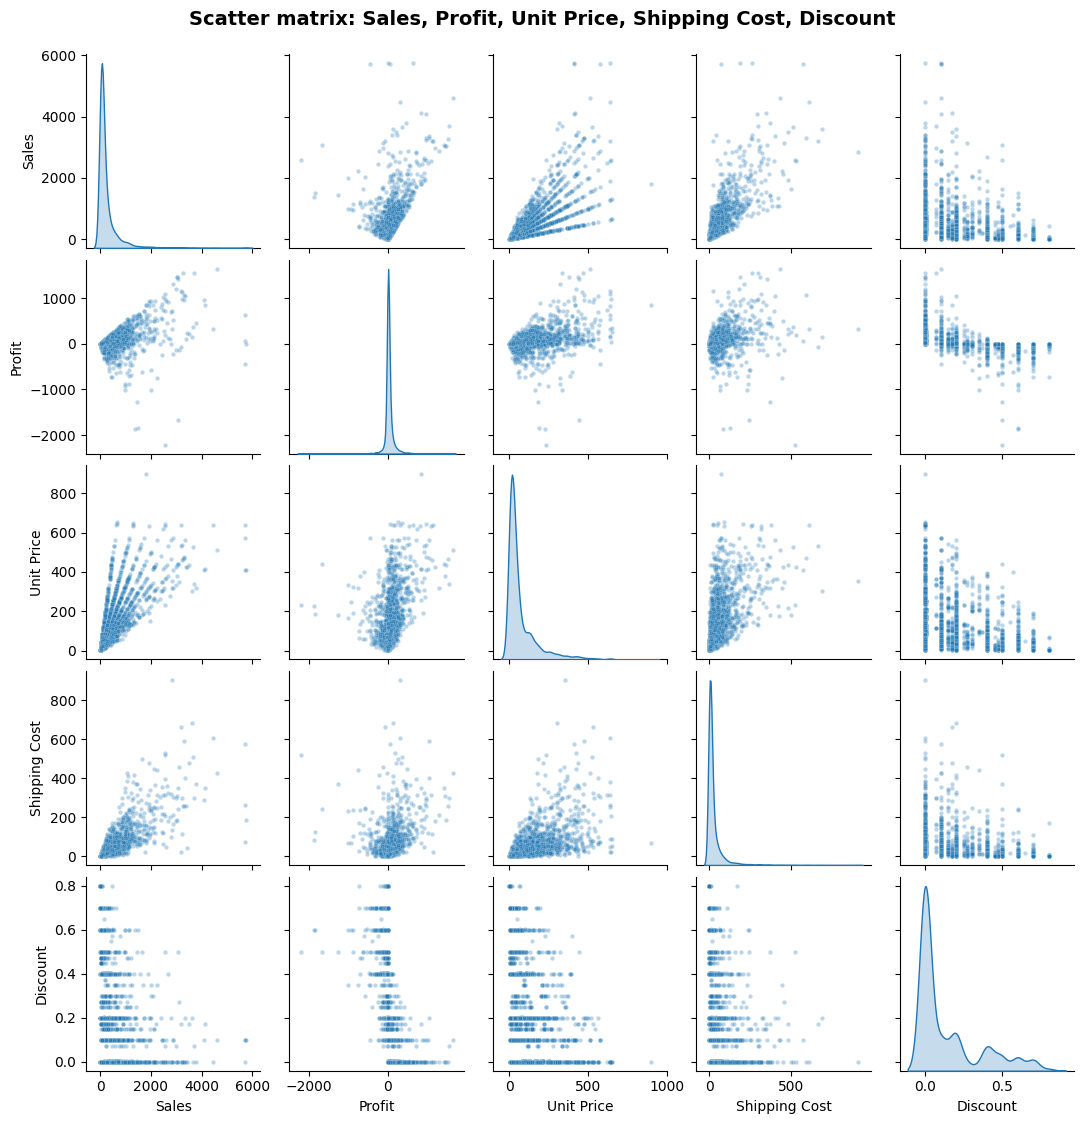

In [ ]:
# Pairplot / Scatter matrix of key financial features
pair_cols = ['Sales', 'Profit', 'Unit Price', 'Shipping Cost', 'Discount']
sample = df_analysis[pair_cols].sample(n=min(5000, len(df_analysis)), random_state=42)

g = sns.pairplot(sample, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10}, height=2.2)
g.figure.suptitle('Scatter matrix: Sales, Profit, Unit Price, Shipping Cost, Discount', y=1.02, fontsize=14, fontweight='bold')
plt.show()

C:\Users\anast\AppData\Local\Temp\ipykernel_20836\3679209378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Bin', y='Profit', data=df_analysis, ax=axes[0], showfliers=False, palette='RdYlGn_r')
C:\Users\anast\AppData\Local\Temp\ipykernel_20836\3679209378.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Bin', y='Profit Margin', data=df_analysis, ax=axes[1], showfliers=False, palette='RdYlGn_r')
C:\Users\anast\AppData\Local\Temp\ipykernel_20836\3679209378.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

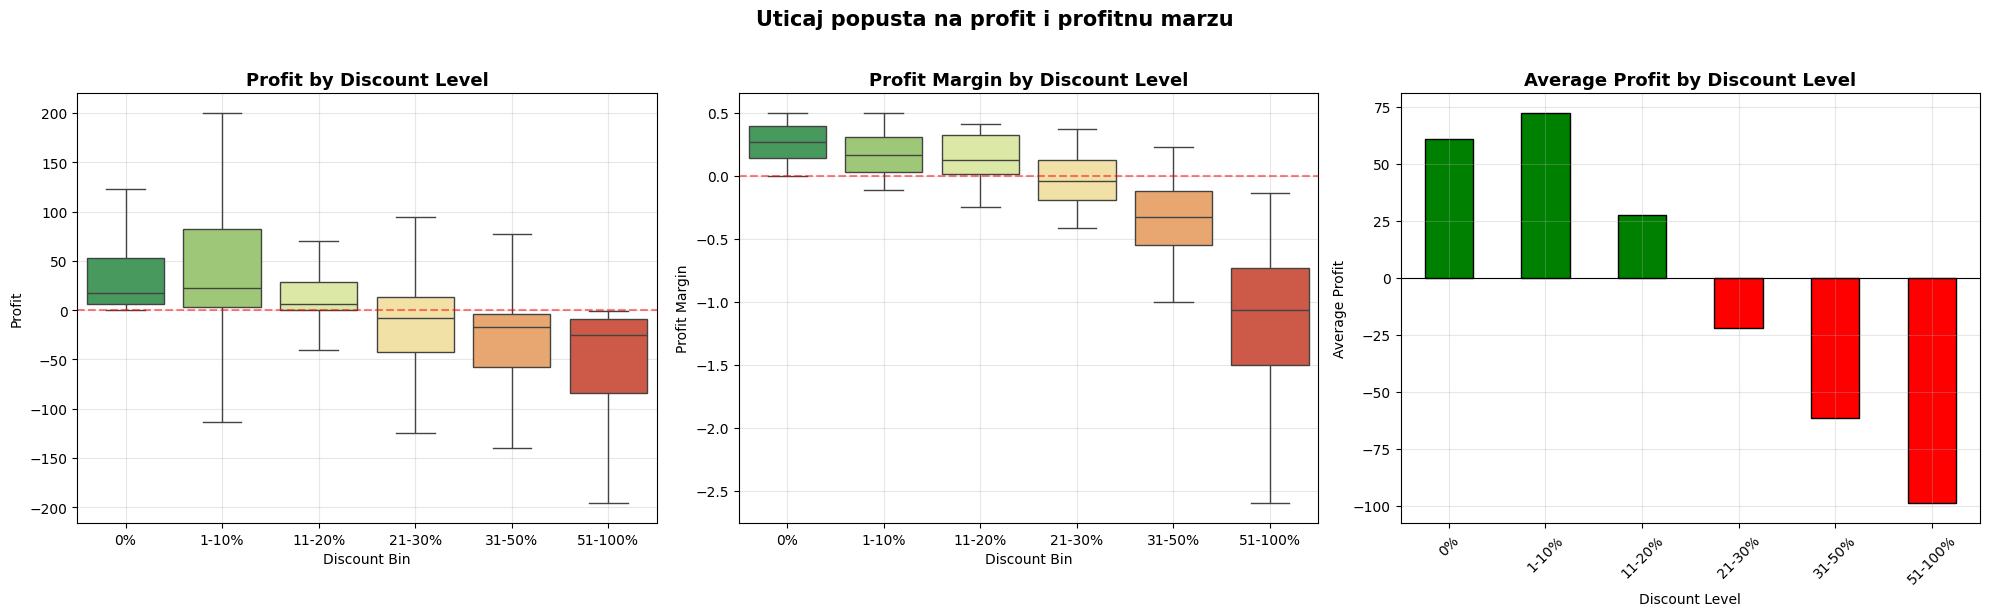

In [ ]:
# Impact of Discount on Profit and Profit Margin
df_analysis['Discount Bin'] = pd.cut(df_analysis['Discount'], bins=[-0.01, 0, 0.1, 0.2, 0.3, 0.5, 1.0],
                                      labels=['0%', '1-10%', '11-20%', '21-30%', '31-50%', '51-100%'])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot: Profit by Discount Bin
sns.boxplot(x='Discount Bin', y='Profit', data=df_analysis, ax=axes[0], showfliers=False, palette='RdYlGn_r')
axes[0].set_title('Profit by Discount Level', fontsize=13, fontweight='bold')
axes[0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0].set_ylabel('Profit')
axes[0].grid(True, alpha=0.3)

# Boxplot: Profit Margin by Discount Bin
sns.boxplot(x='Discount Bin', y='Profit Margin', data=df_analysis, ax=axes[1], showfliers=False, palette='RdYlGn_r')
axes[1].set_title('Profit Margin by Discount Level', fontsize=13, fontweight='bold')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].set_ylabel('Profit Margin')
axes[1].grid(True, alpha=0.3)

# Bar chart: Average Profit by Discount Bin
avg_profit = df_analysis.groupby('Discount Bin')['Profit'].mean()
colors = ['green' if v > 0 else 'red' for v in avg_profit.values]
avg_profit.plot(kind='bar', ax=axes[2], color=colors, edgecolor='black')
axes[2].set_title('Average Profit by Discount Level', fontsize=13, fontweight='bold')
axes[2].axhline(0, color='black', linestyle='-', linewidth=0.8)
axes[2].set_ylabel('Average Profit')
axes[2].set_xlabel('Discount Level')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Uticaj popusta na profit i profitnu marzu', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [34]:
# Drop customer name and product name columns
name_columns = ['Customer Name', 'Product Name']
df = df.drop(columns=name_columns)

print(f"Dropped columns: {name_columns}")
print(f"\nRemaining columns: {list(df.columns)}")

Dropped columns: ['Customer Name', 'Product Name']

Remaining columns: ['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  int64  
 1   Ship Date       51290 non-null  int64  
 2   Ship Mode       51290 non-null  object 
 3   Segment         51290 non-null  object 
 4   City            51290 non-null  object 
 5   State           51290 non-null  object 
 6   Country         51290 non-null  object 
 7   Postal Code     9994 non-null   float64
 8   Market          51290 non-null  object 
 9   Region          51290 non-null  object 
 10  Category        51290 non-null  object 
 11  Sub-Category    51290 non-null  object 
 12  Sales           51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Discount        51290 non-null  float64
 15  Profit          51290 non-null  float64
 16  Shipping Cost   51290 non-null  float64
 17  Order Priority  51290 non-null 

In [36]:
# Analyze cardinality of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Cardinality Analysis for Categorical Columns:")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col:20} | Unique values: {unique_count:5} | Sample: {df[col].iloc[0]}")

Cardinality Analysis for Categorical Columns:
Ship Mode            | Unique values:     4 | Sample: Same Day
Segment              | Unique values:     3 | Sample: Consumer
City                 | Unique values:  3636 | Sample: New York City
State                | Unique values:  1094 | Sample: New York
Country              | Unique values:   147 | Sample: United States
Market               | Unique values:     7 | Sample: US
Region               | Unique values:    13 | Sample: East
Category             | Unique values:     3 | Sample: Technology
Sub-Category         | Unique values:    17 | Sample: Accessories
Order Priority       | Unique values:     4 | Sample: Critical


In [ ]:
id_columns = [col for col in df.columns if 'ID' in col.upper()]
df = df.drop(columns=id_columns)

date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col]).astype('int64') // 10**6

print(f"Dropped columns: {id_columns}")


Dropped columns: ['Row ID', 'Order ID', 'Customer ID', 'Product ID']
Converted to milliseconds: ['Order Date', 'Ship Date']


C:\Users\anast\AppData\Local\Temp\ipykernel_20836\4262827616.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col]).astype('int64') // 10**6
C:\Users\anast\AppData\Local\Temp\ipykernel_20836\4262827616.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col]).astype('int64') // 10**6


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1343692800000,1343692800000,Same Day,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,1360022400000,1360195200000,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,1381968000000,1382054400000,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,1359331200000,1359504000000,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,1383609600000,1383696000000,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [37]:
# Drop high-cardinality columns not useful for clustering
high_cardinality_cols = ['City', 'Postal Code', 'State', 'Country', 'Region', 'Ship Date', 'Order Date', 'Category', 'Sub-Category']

df = df.drop(columns=high_cardinality_cols)

print(f"Dropped columns: {high_cardinality_cols}")
print(f"\nRemaining categorical columns:")
remaining_categorical = df.select_dtypes(include=['object']).columns.tolist()
print(remaining_categorical)

Dropped columns: ['City', 'Postal Code', 'State', 'Country', 'Region', 'Ship Date', 'Order Date', 'Category', 'Sub-Category']

Remaining categorical columns:
['Ship Mode', 'Segment', 'Market', 'Order Priority']


In [38]:
# Bucket Market into Continent, then one-hot encode categorical features
from sklearn.preprocessing import LabelEncoder

df_cluster = df.copy()

# Bucket Market into Continent
continent_map = {
    'US': 'North America',
    'Canada': 'North America',
    'LATAM': 'South America',
    'EU': 'Europe',
    'EMEA': 'Middle East',
    'Africa': 'Africa',
    'APAC': 'Asia Pacific'
}
df_cluster['Continent'] = df_cluster['Market'].map(continent_map)

# One-hot encode: Continent, Ship Mode, Segment
ohe_cols = ['Continent', 'Ship Mode', 'Segment', 'Order Priority']
df_ohe = pd.get_dummies(df_cluster[ohe_cols], drop_first=True)

# Drop the original columns + Market
df_cluster = df_cluster.drop(columns=ohe_cols + ['Market'])

# Add the one-hot encoded columns
df_cluster = pd.concat([df_cluster, df_ohe], axis=1)

# Label encode remaining categorical columns (Category, Sub-Category, Order Priority)
remaining_cat = df_cluster.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in remaining_cat:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col].astype(str))
    label_encoders[col] = le
    print(f"Label Encoded {col}: {le.classes_}")

print(f"\nOne-hot encoded: {ohe_cols}")
print(f"Label encoded: {remaining_cat}")
print(f"\nFinal columns ({len(df_cluster.columns)}):")
print(list(df_cluster.columns))
df_cluster.head()


One-hot encoded: ['Continent', 'Ship Mode', 'Segment', 'Order Priority']
Label encoded: []

Final columns (18):
['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Continent_Asia Pacific', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_South America', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Order Priority_High', 'Order Priority_Low', 'Order Priority_Medium']


,Sales,Quantity,Discount,Profit,Shipping Cost,Continent_Asia Pacific,Continent_Europe,Continent_Middle East,Continent_North America,Continent_South America,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2309.650,7,0.0,762.1845,933.57,False,False,False,True,False,True,False,False,False,False,False,False,False
1,3709.395,9,0.1,-288.7650,923.63,True,False,False,False,False,False,True,False,True,False,False,False,False
2,5175.171,9,0.1,919.9710,915.49,True,False,False,False,False,False,False,False,False,False,False,False,True
3,2892.510,5,0.1,-96.5400,910.16,False,True,False,False,False,False,False,False,False,True,False,False,True
4,2832.960,8,0.0,311.5200,903.04,False,False,False,False,False,True,False,False,False,False,False,False,False


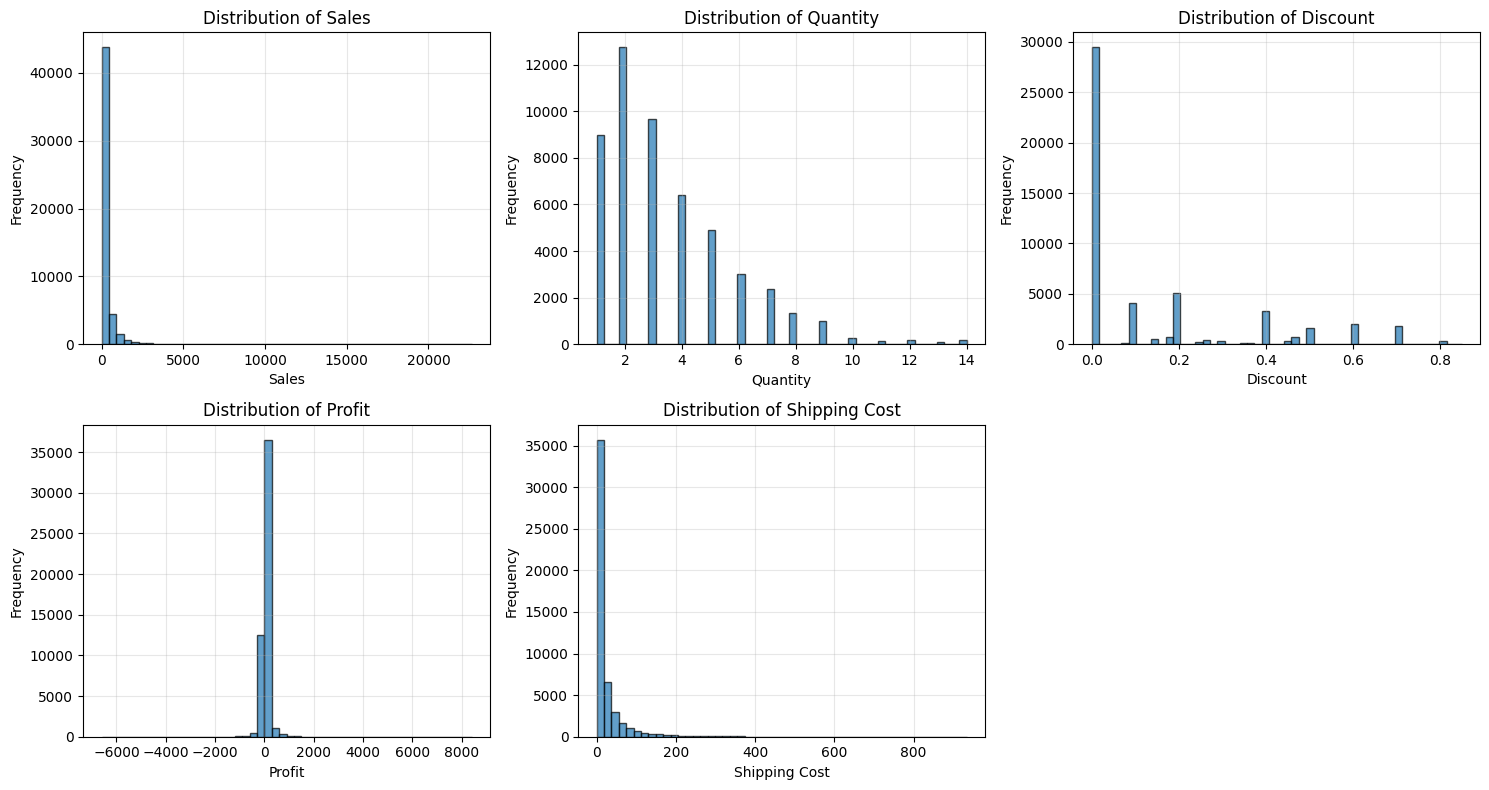

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_cluster.select_dtypes(include=[np.number]).columns.tolist()

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df_cluster[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for clustering - remove nulls and scale
from sklearn.preprocessing import StandardScaler

df_cluster_clean = df_cluster.dropna()
df_cluster_clean = df_cluster_clean[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_clean)

print(f"Shape of data for clustering: {X_scaled.shape}")
print(f"Number of features: {X_scaled.shape[1]}")
print(f"Number of samples: {X_scaled.shape[0]}")

Shape of data for clustering: (51290, 5)
Number of features: 5
Number of samples: 51290


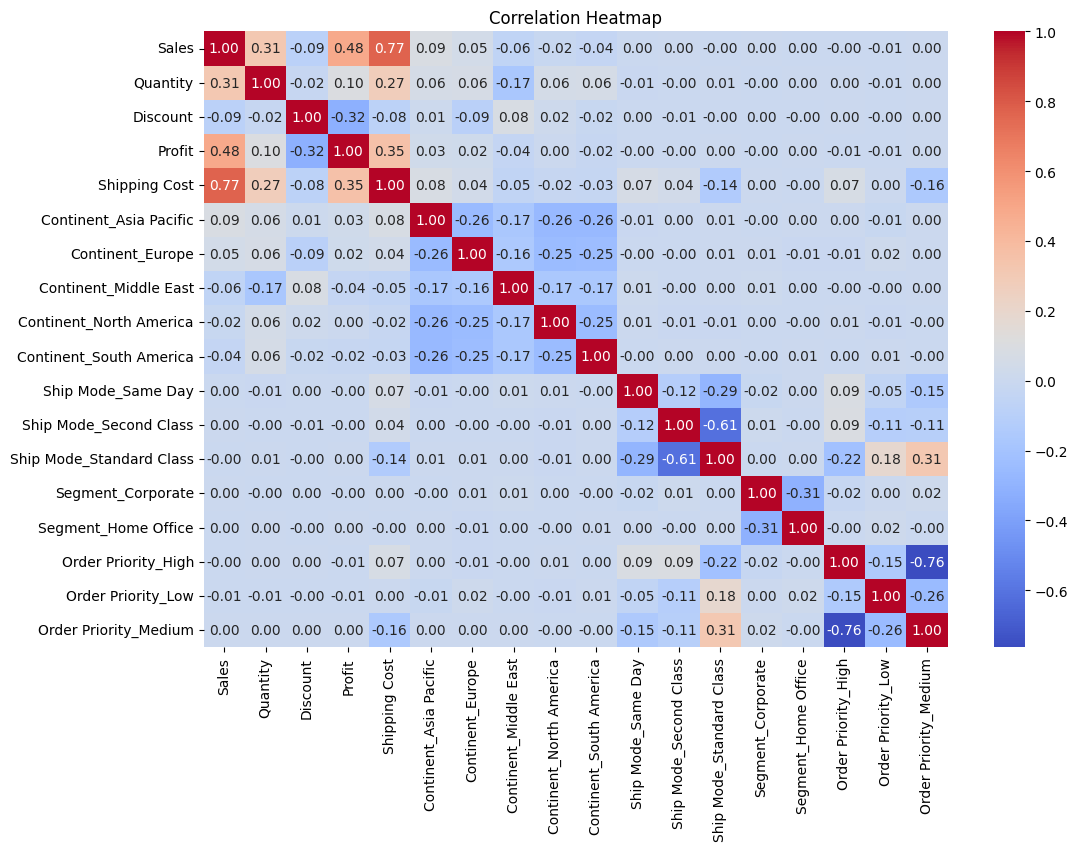

In [41]:
numeric_df = df_cluster.select_dtypes(include=[np.number, np.bool_])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

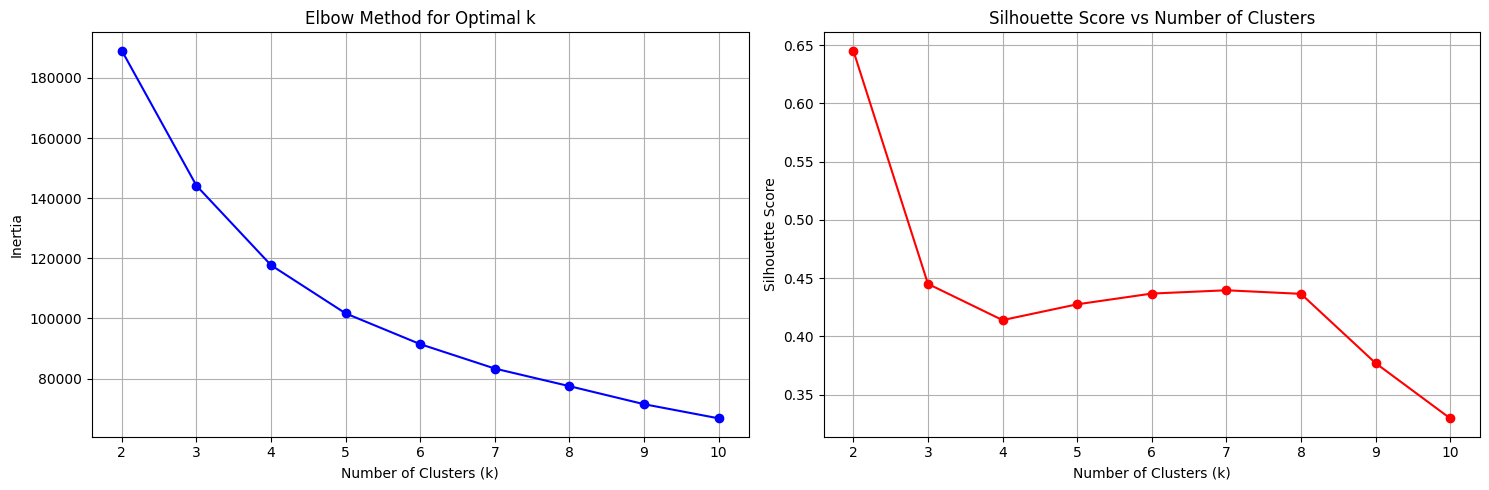

In [48]:
# K-Means: Find optimal k using elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [49]:
# Apply K-Means with optimal k
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster_clean['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print(f"K-Means Clustering with k={optimal_k}")
print("\nCluster distribution:")
print(df_cluster_clean['KMeans_Cluster'].value_counts().sort_index())

K-Means Clustering with k=2

Cluster distribution:
KMeans_Cluster
0    48639
1     2651
Name: count, dtype: int64


In [55]:
cluster_col = 'KMeans_Cluster'
profile = df_cluster_clean.groupby(cluster_col)[
    ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
].mean()
print(profile.round(2))

                  Sales  Quantity  Discount  Profit  Shipping Cost
KMeans_Cluster                                                    
0                165.23      3.34      0.15   10.32          16.63
1               1737.37      5.93      0.06  364.29         205.16


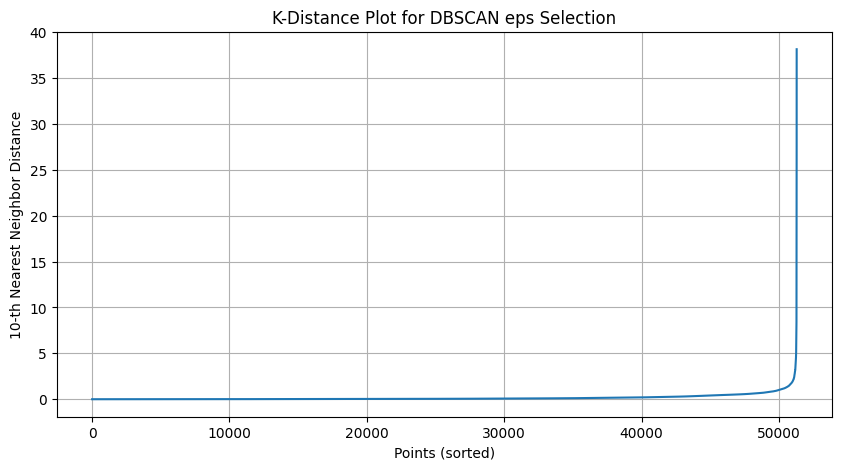

Selected eps: 0.9094, min_samples: 10

DBSCAN Clustering (eps=0.9094, min_samples=10)

Cluster distribution:
DBSCAN_Cluster
-1     1090
 0       10
 1    50190
Name: count, dtype: int64

Number of noise points (label=-1): 1090
Number of clusters found: 2


In [50]:
# Apply DBSCAN - use k-distance plot to find optimal eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Rule of thumb: min_samples = 2 * n_features
min_samples = 2 * X_scaled.shape[1]

# Compute k-nearest neighbor distances to find eps
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.xlabel('Points (sorted)')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('K-Distance Plot for DBSCAN eps Selection')
plt.grid(True)
plt.show()

# Use the elbow/knee of the curve as eps
# A good heuristic: find where the rate of change increases sharply
eps_value = np.percentile(k_distances, 97)
print(f"Selected eps: {eps_value:.4f}, min_samples: {min_samples}")

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df_cluster_clean['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(f"\nDBSCAN Clustering (eps={eps_value:.4f}, min_samples={min_samples})")
print("\nCluster distribution:")
print(df_cluster_clean['DBSCAN_Cluster'].value_counts().sort_index())
print(f"\nNumber of noise points (label=-1): {(df_cluster_clean['DBSCAN_Cluster'] == -1).sum()}")
print(f"Number of clusters found: {len(set(df_cluster_clean['DBSCAN_Cluster'])) - (1 if -1 in df_cluster_clean['DBSCAN_Cluster'].values else 0)}")

In [51]:
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_cluster_clean['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

print(f"Hierarchical Clustering with {n_clusters} clusters")
print("\nCluster distribution:")
print(df_cluster_clean['Hierarchical_Cluster'].value_counts().sort_index())

Hierarchical Clustering with 2 clusters

Cluster distribution:
Hierarchical_Cluster
0    46699
1     4591
Name: count, dtype: int64


In [54]:
# Compare clustering algorithms
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

results = []

# K-Means metrics
kmeans_silhouette = silhouette_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
kmeans_calinski = calinski_harabasz_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
kmeans_davies = davies_bouldin_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
results.append(['K-Means', kmeans_silhouette, kmeans_calinski, kmeans_davies])

# DBSCAN metrics (excluding noise)
dbscan_mask = df_cluster_clean['DBSCAN_Cluster'] != -1
n_dbscan_clusters = df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'].nunique()

if dbscan_mask.sum() > 0 and n_dbscan_clusters >= 2:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    dbscan_calinski = calinski_harabasz_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    dbscan_davies = davies_bouldin_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    results.append(['DBSCAN', dbscan_silhouette, dbscan_calinski, dbscan_davies])
else:
    print(f"\nWarning: DBSCAN found only {n_dbscan_clusters} cluster(s). Skipping metrics calculation.")
    results.append(['DBSCAN', None, None, None])

# Hierarchical metrics
hier_silhouette = silhouette_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
hier_calinski = calinski_harabasz_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
hier_davies = davies_bouldin_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
results.append(['Hierarchical', hier_silhouette, hier_calinski, hier_davies])

comparison_df = pd.DataFrame(results, columns=['Algorithm', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])
print("CLUSTERING ALGORITHM COMPARISON")
print("="*80)
print("\n" + "="*80)
print(comparison_df.to_string(index=False))

CLUSTERING ALGORITHM COMPARISON

   Algorithm  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
     K-Means          0.645180       18275.377457        0.946041
      DBSCAN          0.697103         161.179658        0.304826
Hierarchical          0.533928       15442.210489        1.139212


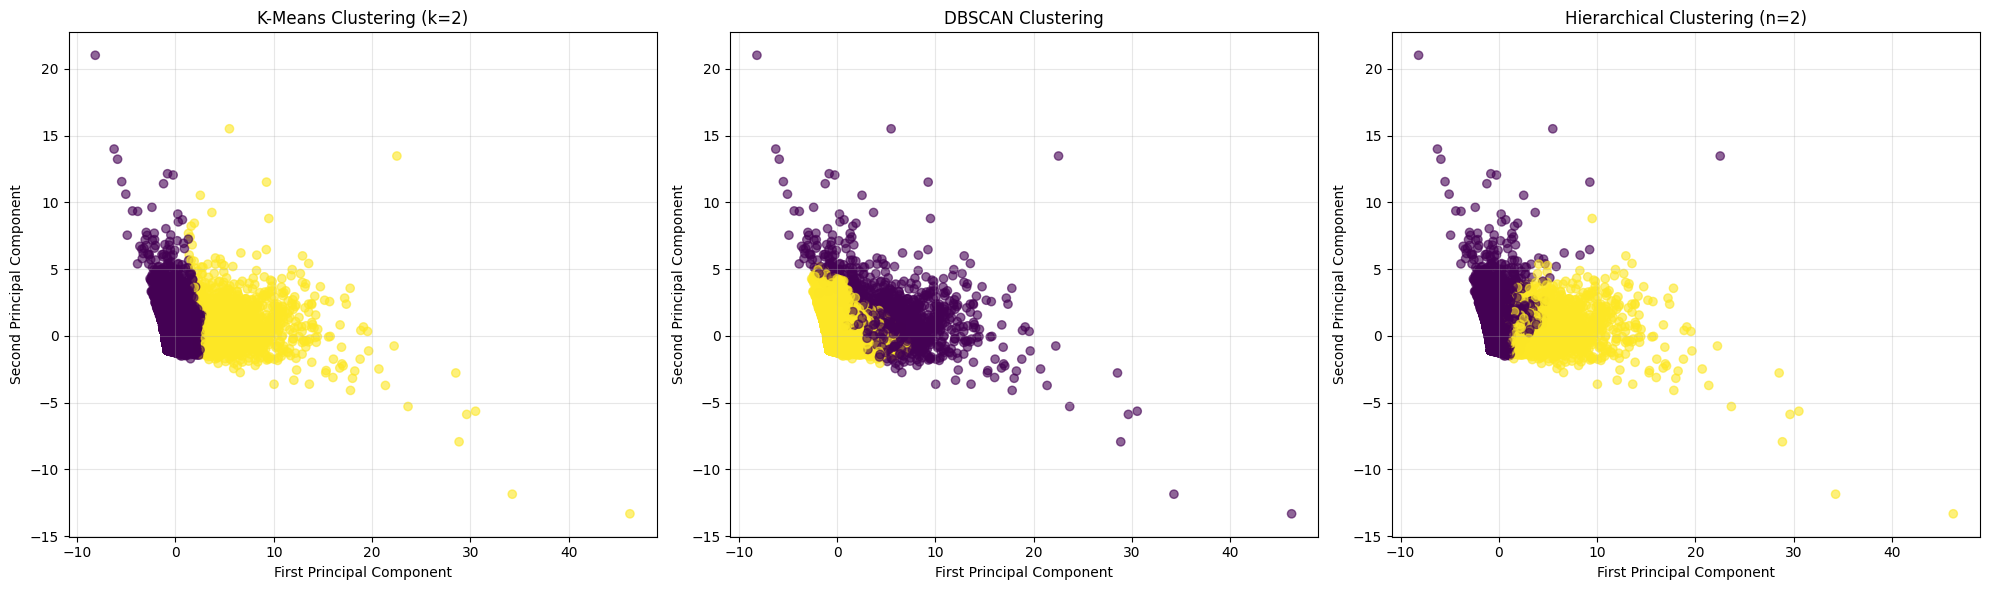


PCA explained variance ratio: [0.45591581 0.22409004]
Total variance explained: 68.00%


In [53]:
# Visualize clusters with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['KMeans_Cluster'], cmap='viridis', alpha=0.6)
axes[0].set_title(f'K-Means Clustering (k={optimal_k})')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['Hierarchical_Cluster'], cmap='viridis', alpha=0.6)
axes[2].set_title(f'Hierarchical Clustering (n={n_clusters})')
axes[2].set_xlabel('First Principal Component')
axes[2].set_ylabel('Second Principal Component')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")